In [1]:
### Importing all the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

In [3]:
## Import the dataset into a dataframe called df
df = pd.read_csv('/content/Data Science HW design model.csv')
df.head()   ## Read the first five rows of the dataframe df

# Import the test data set
df2 = pd.read_csv('/content/Data Science HW design val.csv')
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,22.88,75.59,3367.08,6131.31,41.38,43.08,2.13,102.67,0.500,0.500,75.85,9.48,22.22,58.46,42131.54,0.65,4005.22,0.33,0.33,1.25,28,0.08,0.00,0.05,0.17,0.00,1035.14,158.71,13.28,0.00,1
1,15.94,86.26,5595.00,10867.86,52.29,61.21,3.05,124.94,3.200,2.400,75.00,11.72,15.73,63.36,148530.21,0.33,2281.82,0.38,0.00,2.37,64,0.01,0.00,0.00,0.06,438.50,0.00,72.78,44.88,25.39,1
2,25.16,64.20,4758.44,7818.15,46.28,50.72,2.69,110.16,1.124,0.889,62.57,10.53,32.24,62.83,39652.58,0.55,3050.54,0.36,0.25,1.51,55,0.08,0.02,0.02,0.10,622.70,755.52,102.89,6.24,0.00,1
3,19.50,77.81,5762.27,6290.00,58.14,76.27,2.44,119.92,1.222,1.000,82.50,9.65,48.73,66.29,86341.79,0.50,4169.09,0.31,0.27,2.69,283,0.04,0.00,0.01,0.08,197.55,396.27,76.34,8.44,2.00,1
4,11.11,85.09,11400.50,20936.25,30.00,29.75,0.50,125.89,2.167,1.333,95.86,10.35,37.20,63.30,224497.30,0.00,8970.00,0.00,0.00,1.25,26,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,1


# Exploratory Data Analysis

##### There are 31 columns, The first 30 are from A1 to A30 the independent columns. The last one is the dependent column i.e the default.




In [4]:
print('The number of rows and columns in this particular dataset are',df.shape)
print("------------------------------------------------------------------------------------------------------------------")


The number of rows and columns in this particular dataset are (94000, 31)
------------------------------------------------------------------------------------------------------------------


In [5]:
print('The data types of each field in particular dataset are',df.dtypes)


The data types of each field in particular dataset are A1         float64
A2         float64
A3         float64
A4         float64
A5         float64
A6         float64
A7         float64
A8         float64
A9         float64
A10        float64
A11        float64
A12        float64
A13        float64
A14        float64
A15        float64
A16        float64
A17        float64
A18        float64
A19        float64
A20        float64
A21          int64
A22        float64
A23        float64
A24        float64
A25        float64
A26        float64
A27        float64
A28        float64
A29        float64
A30        float64
default      int64
dtype: object


##### The data types of each fields are float except A21 and default

### Checking for Null values

In [6]:
print('Checking if there are any null values in the Data',df.isnull())

print('Checking if there are any null values in the Data',df.isnull().values.any())
print('Checking if there are any null values in the Data',df.isnull().sum())


Checking if there are any null values in the Data           A1     A2     A3     A4     A5  ...    A27    A28    A29    A30  default
0      False  False  False  False  False  ...  False  False  False  False    False
1      False  False  False  False  False  ...  False  False  False  False    False
2      False  False  False  False  False  ...  False  False  False  False    False
3      False  False  False  False  False  ...  False  False  False  False    False
4      False  False  False  False  False  ...  False  False  False  False    False
...      ...    ...    ...    ...    ...  ...    ...    ...    ...    ...      ...
93995  False  False  False  False  False  ...  False  False  False  False    False
93996  False  False  False  False  False  ...  False  False  False  False    False
93997  False  False  False  False  False  ...  False  False  False  False    False
93998  False  False  False  False  False  ...  False  False  False  False    False
93999  False  False  False  False  Fa

#### There are no null values in the dataset

### Let's check the number of classes in the default field

In [7]:
print('Value count of fields in the output field that is isFraud\n',df.default.value_counts())


Value count of fields in the output field that is isFraud
 0    90000
1     4000
Name: default, dtype: int64


#### There are two classes 0 and 1, 0 has 90000 rows where as 1 has just 4000 rows, Clearly, this is a class imbalance dataset. We will handle this some steps after

#### Let's find out all the fields and the count of unique values present in them, this might give a better insight about the field

In [8]:
print('Unique Value counts in the data',df.nunique())


Unique Value counts in the data A1          3381
A2          4541
A3         73162
A4         59682
A5          6144
A6          6777
A7           755
A8         14728
A9          2647
A10         2124
A11         4955
A12         2035
A13         4946
A14         6608
A15        79651
A16          242
A17        46499
A18          172
A19          165
A20          504
A21          587
A22          213
A23           48
A24           66
A25          180
A26        45351
A27        45396
A28        29538
A29        14293
A30        18430
default        2
dtype: int64


### Descriptive Stats about the dataset

In [9]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,82.561804,11.364377,20.453328,55.172549,1.036205e+05,0.282347,4113.993992,0.190747,0.112162,1.545606,53.707096,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,10.740732,2.767727,11.671429,12.015331,5.954836e+04,0.252047,1300.549863,0.181137,0.142458,0.627285,56.617973,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,77.270000,9.640000,13.600000,49.070000,6.562992e+04,0.130000,3422.220000,0.080000,0.000000,1.140000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,83.340000,11.330000,19.110000,55.190000,9.074253e+04,0.250000,4050.000000,0.170000,0.090000,1.450000,39.000000,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,89.010000,12.790000,25.170000,61.810000,1.282739e+05,0.360000,4668.192500,0.250000,0.140000,1.860000,69.000000,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,100.000000,35.430000,237.000000,146.000000,1.079286e+06,7.000000,20000.000000,3.250000,5.000000,8.100000,1902.000000,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


#### The mean and standard deviation

A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out.

min, 25%, 50%, 75% and max values, when a column is sorted in ascending order, The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25th percentile. The 50th, 75th percentiles are also similar, and the max is the largest number in that field.

### Histogram of the dataset fields

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b8abcdc10>,
      dtype=object)

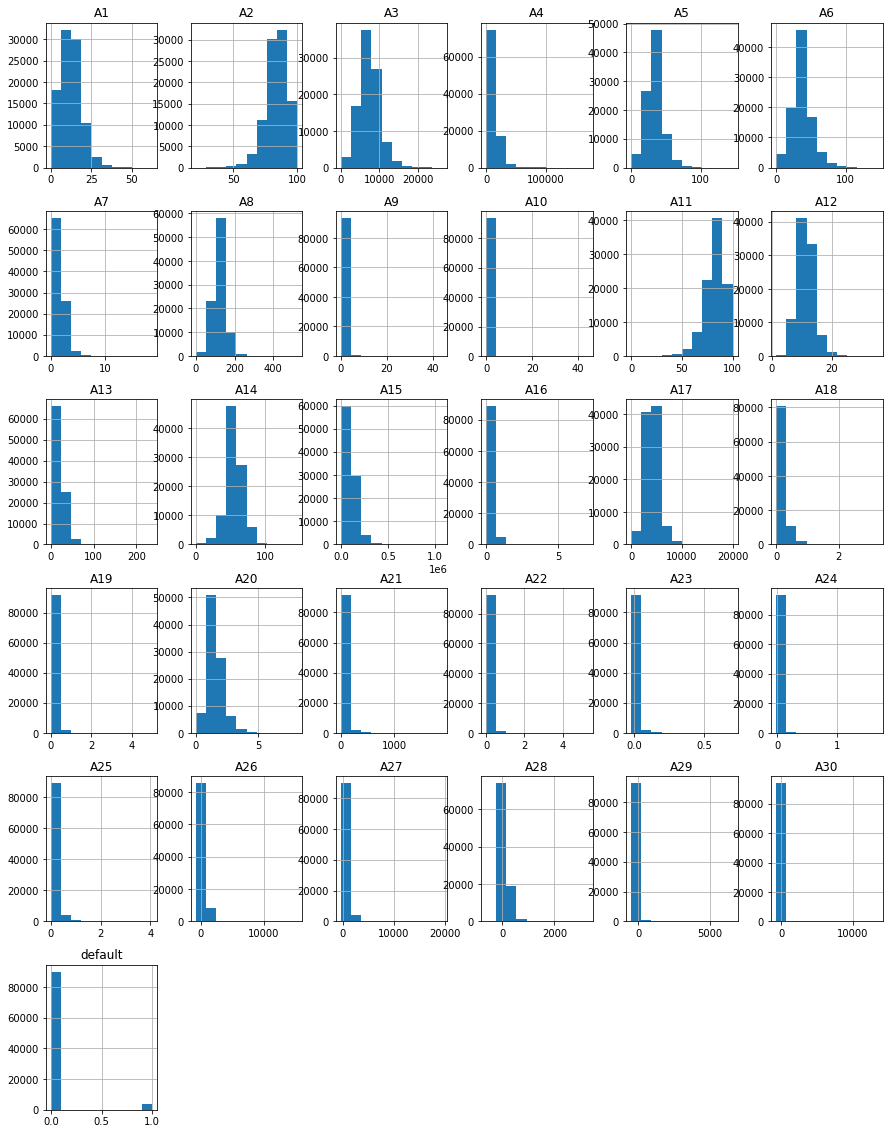

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

### The histogram tells us the distribution of datapoints. 

From the histograms, None of the fields are normally distributed. The Plots are either Positively skewed or negatively skewed.

Skewness is nothing but measure of asymmetry

2 Types.
1. Positively Skewed - A positively skewed distribution is the distribution with the tail on its right side. The value of skewness for a positively skewed distribution is greater than zero. 

2. Negatively Skewed - A negatively skewed distribution is the distribution with the tail on its left side. The value of skewness for a negatively skewed distribution is less than zero. mean < median < mode.

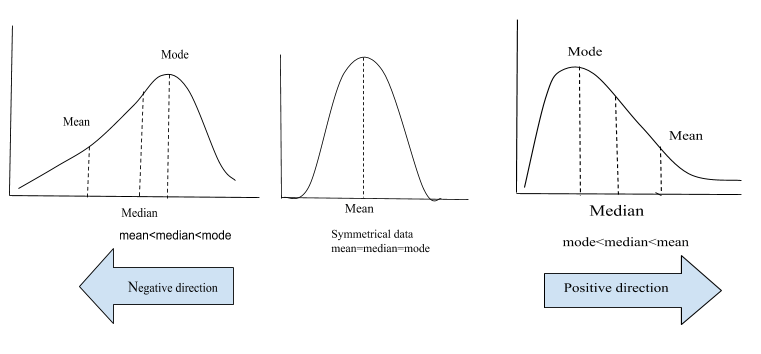
Image source - wikipedia


Why Skewness is important?
Because, Skewness tells us about the direction of outliers. You can see that our distribution is positively skewed and most of the outliers are present on the right side of the distribution.

# Feature Engineering

### Imputation (missing values)
Let's check again, If the dataset consists of missing values.

In [11]:
print('Checking if there are any null values in the Data',df.isnull())

print('Checking if there are any null values in the Data',df.isnull().values.any())
print('Checking if there are any null values in the Data',df.isnull().sum())


Checking if there are any null values in the Data           A1     A2     A3     A4     A5  ...    A27    A28    A29    A30  default
0      False  False  False  False  False  ...  False  False  False  False    False
1      False  False  False  False  False  ...  False  False  False  False    False
2      False  False  False  False  False  ...  False  False  False  False    False
3      False  False  False  False  False  ...  False  False  False  False    False
4      False  False  False  False  False  ...  False  False  False  False    False
...      ...    ...    ...    ...    ...  ...    ...    ...    ...    ...      ...
93995  False  False  False  False  False  ...  False  False  False  False    False
93996  False  False  False  False  False  ...  False  False  False  False    False
93997  False  False  False  False  False  ...  False  False  False  False    False
93998  False  False  False  False  False  ...  False  False  False  False    False
93999  False  False  False  False  Fa

#### No Missing Values in the dataset.

# Outlier Removal

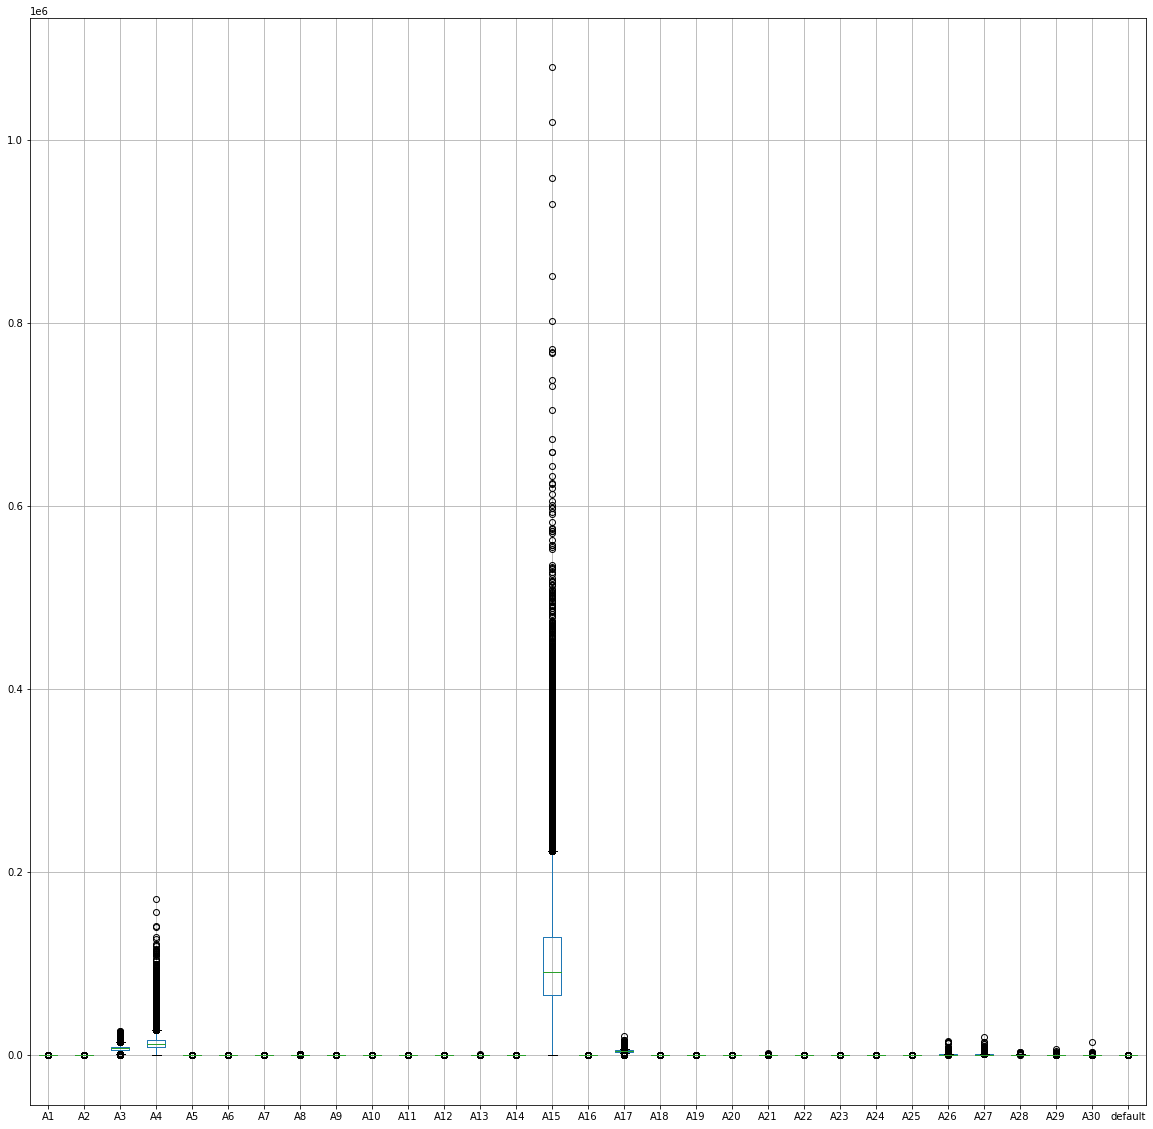

In [12]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.boxplot(ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


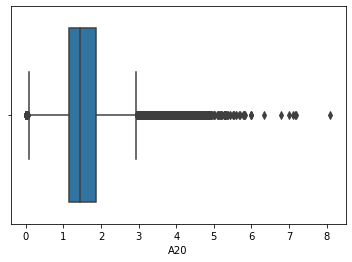

In [13]:
import seaborn as sns
sns.boxplot(df['A20'])

BOXPLOT - A boxplot is a graph that gives you a good indication of how the values in the data are spread out
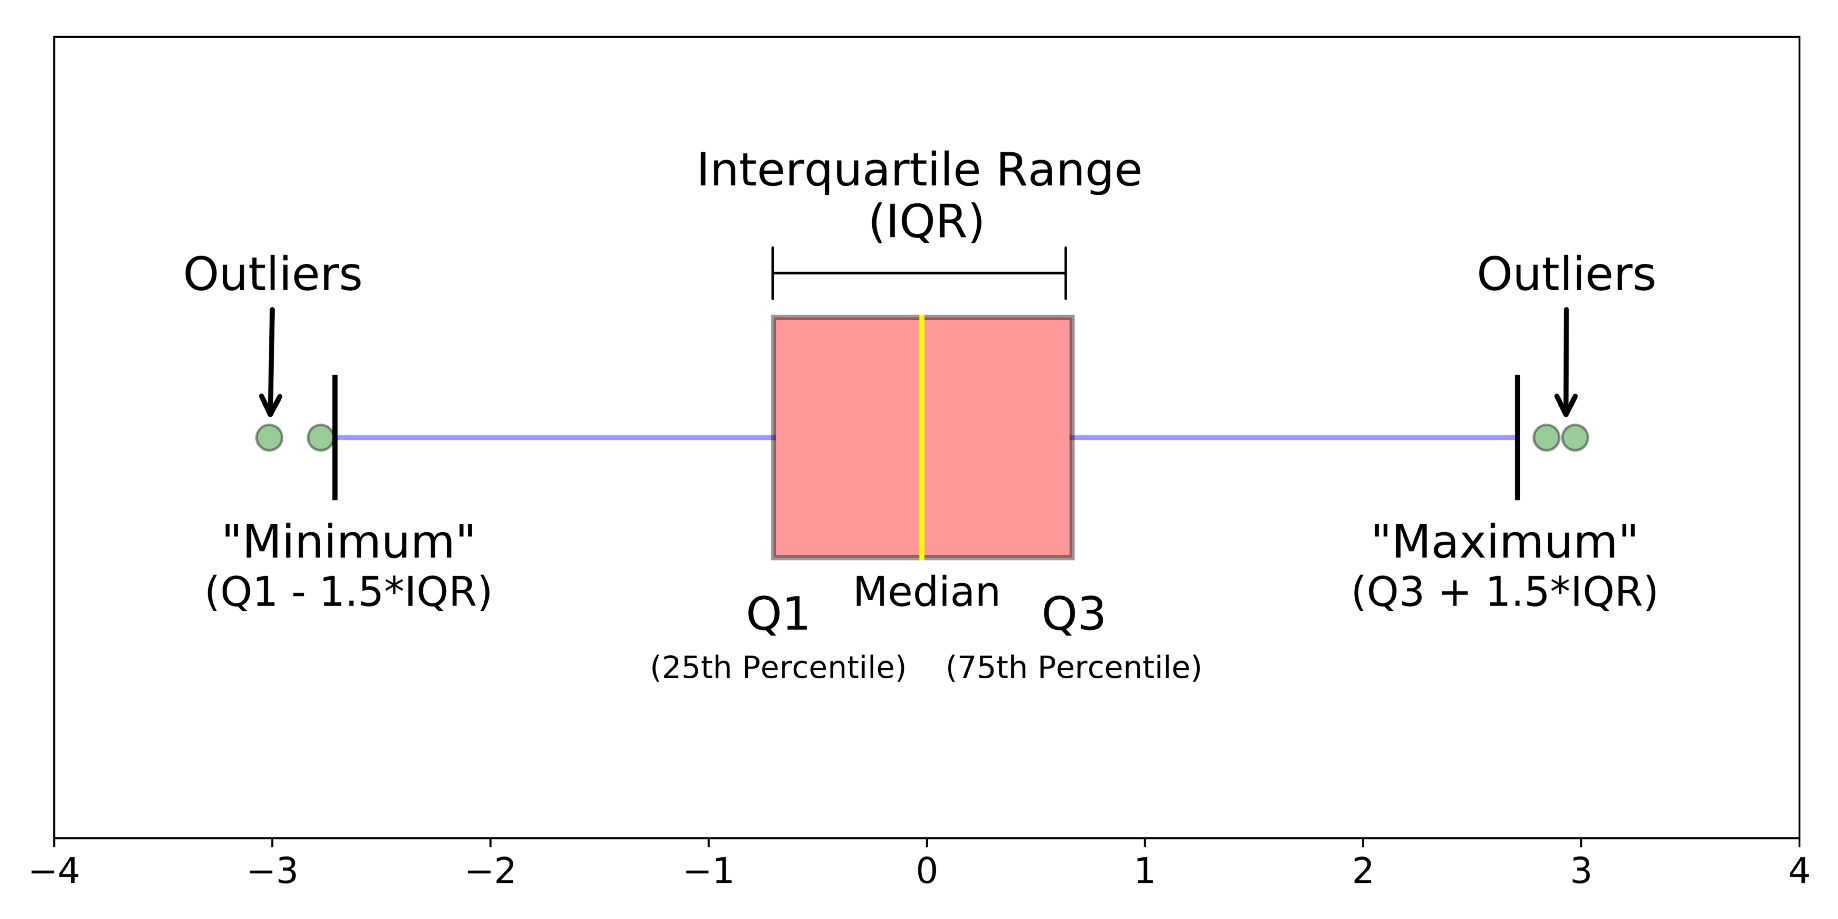

Image credits - wikipedia

Observation from our dataset's boxplots - Most of the fields are filled with outliers

#### 1. Replace Negative values with 0.

In [14]:
## Converting all non positive rows into 0 for better model prediction 
df[df < 0] = 0


#### 2. Outlier removal with Z-score

In [15]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 6).all(axis=1)] ## using z score to remove outliers, here only the datapoints where the standard deviation is less than 6 are considered


A z-score gives an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a datapoint is.

Usually, the z score constraint will be 3 (based on domain) but I have taken it as 6 as I don't want data leakage.

In [ ]:
## let's check the size of the dataset after removing outliers

In [16]:
df.shape

(90570, 31)

In [17]:
df.default.value_counts()

0    86832
1     3738
Name: default, dtype: int64

#### Let's now see the histograms again, to check if it is better than previous after outlier removal.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b870abc90>,
      dtype=object)

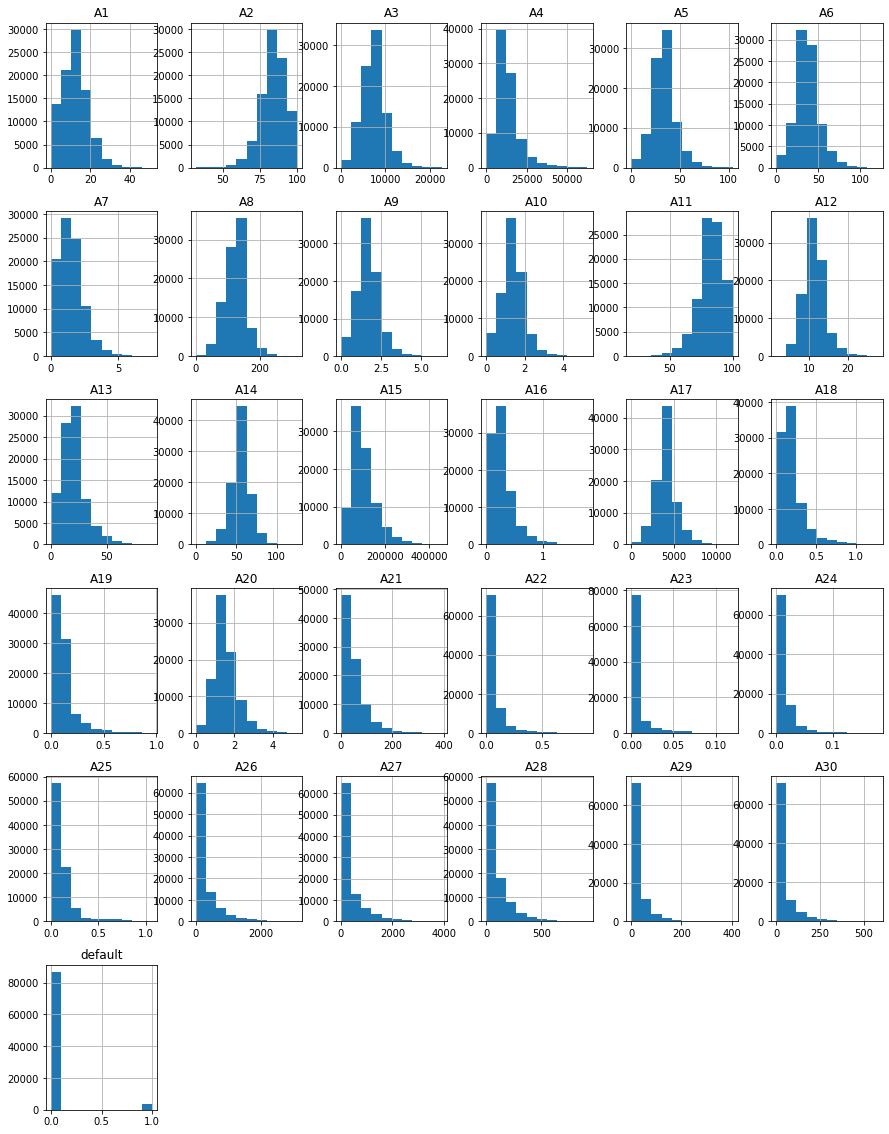

In [18]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

So around 3430 rows have been removed, 230 rows from 'Yes Default' have been removed.

# Feature Selection

In [19]:
X = df.iloc[:,0:30]    # Separating the independent field from df and storing in X
y = df.iloc[:,-1]      # Separating the dependent field from df and storing in y

##Test
X_test_data = df2.iloc[:,0:30]      # Separating the independent field from df and storing in Xtestdata
y_test_data = df2.iloc[:,-1] #  # Separating the dependent field from df and storing in ytestdata




#### Univariate Feature Selection ( Most Important Features)

The concept - If the feature is independent of the target, then the feature will likely not be useful in predicting the target. If they are not independent, then the feature will most likely have predictive power on the target.

Chi-Squared test because it is classification.

In [20]:
### Univariate feature selection model building

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestFeatures = SelectKBest(score_func=chi2) # The SelectKBest class just scores the features using a function
fit = bestFeatures.fit(X,y) # calling the fit that checks for the best features

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two df for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print("THE TOP 15 Features are")
print(featureScores.nlargest(15,'Score'))

THE TOP 15 Features are
   Specs         Score
14   A15  3.605744e+07
3     A4  6.307219e+06
2     A3  2.450032e+06
16   A17  3.793503e+05
25   A26  3.169254e+04
7     A8  1.706443e+04
0     A1  1.568871e+04
5     A6  1.482574e+04
12   A13  1.217008e+04
4     A5  1.155161e+04
1     A2  3.578692e+03
13   A14  3.558056e+03
29   A30  3.391709e+03
10   A11  3.058551e+03
27   A28  2.566672e+03


In [21]:
print("THE least impacting 10 Features are")
print(featureScores.nsmallest(10,'Score'))

THE least impacting 10 Features are
   Specs       Score
22   A23    0.105974
24   A25    0.318280
23   A24    1.741543
21   A22   10.055295
18   A19  140.995428
17   A18  183.389069
20   A21  211.036561
19   A20  225.246671
15   A16  292.390831
9    A10  399.313832


### Correlation Analysis

Correlation is a statistical measure that expresses the extent to which two variables are related

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions.

We describe correlations with a unit-free measure called the correlation coefficient which ranges from -1 to +1


1. The closer r is to zero, the weaker the linear relationship

2. Positive r values indicate a positive correlation, where the values of both variables tend to increase together.

3. Negative r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.






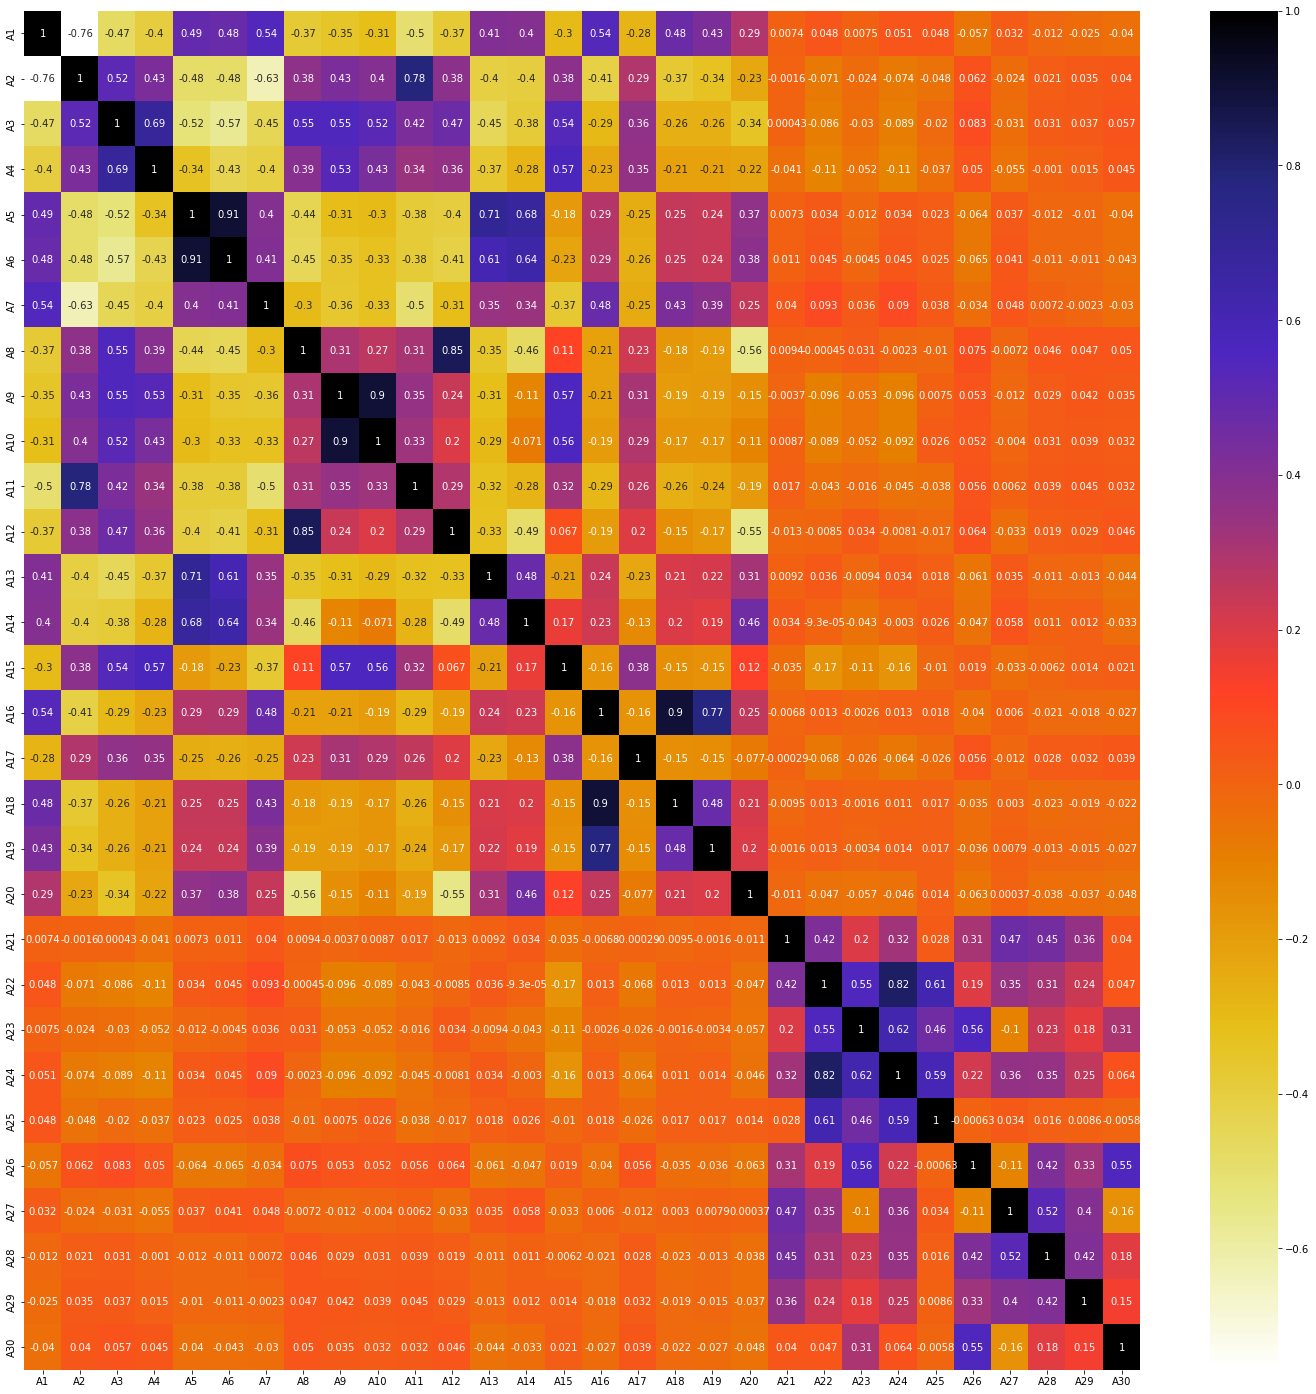

In [22]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = X.corr()  # plot the heatmap on X
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### Multicollinearity
Multicollinearity occurs when independent variables in a regression model are correlated, if the correlation value is high then it might cause lower performance of the model.

To handle Multicollinearity, we remove one among the two columns that are highly correlated to each other.

The function below is used to find out the fields that are correlated beyond a threshold value.

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)): ## make sure no duplicates are returned
        for j in range(i):                           
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X, 0.90)
len(set(corr_features))

2

In [25]:
print('The highly correlated independent fields are',corr_features)


The highly correlated independent fields are {'A10', 'A6'}


In [26]:
# Dropping the highly correlated feature from both train and test data set
df.drop(corr_features,axis=1,inplace=True)
df2.drop(corr_features,axis=1,inplace=True)



In [27]:
df.shape

(90570, 29)

In [28]:
X = df.iloc[:,0:28]    # Separating the independent field from df and storing in X
y = df.iloc[:,-1]      # Separating the dependent field from df and storing in y

##Test
X_test_data = df2.iloc[:,0:28]      # Separating the independent field from df and storing in Xtestdata
y_test_data = df2.iloc[:,-1] #  # Separating the dependent field from df and storing in ytestdata




# Model Building (Without Class imbalance problem handling)

There is a huge difference in the classes of the default field, before handling, let's check how the model performs.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb




log_reg = LogisticRegression(solver='liblinear')
#model2 = xgb.XGBClassifier(max_depth =3, objective="binary:logistic", random_state=42)

rand_for = RandomForestClassifier(max_depth=5, random_state=0,n_estimators = 1000)




log_reg.fit(X, y)
rand_for.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Model Evalutaion Metric

Since our class is imbalanced, finding out accuracy would be the worst choice. even if our model would predict all 0, the accuracy will be greater than 90%.

Our goal is to correctly classify the defaulters.


# AUC-ROC Score 
##### The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

##### The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

##### When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

##### When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

##### When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

##### So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

##### Let's use AUC ROC score to check the performance of our models.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC3.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC3.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC2.png)

image credits - medium.com

#### Model Prediction and Evaluation

In [32]:
## model prediction
pred_prob1 = log_reg.predict_proba(X_test_data)
pred_prob2 = rand_for.predict_proba(X_test_data)


## Model Evaluation
from sklearn.metrics import roc_curve
 #roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test_data, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_data, pred_prob2[:,1], pos_label=1) ## pred_prob1 - predict probability of 1 class


##pos_label - label of positive class
## pred_prob1 - predict probability of 1 class



from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_data, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_data, pred_prob2[:,1])



print('the AUC score for Logistic Regression Model is -      ',auc_score1)
print("")
print('the AUC score for Random Forest Classifier Model is -   ',auc_score2)
print("")




the AUC score for Logistic Regression Model is -       0.8110396000000001

the AUC score for Random Forest Classifier Model is -    0.8233674666666667



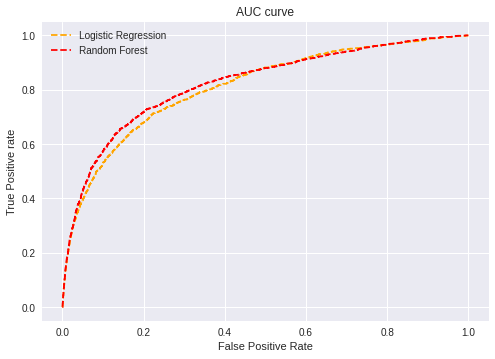

In [33]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Random Forest')


#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


# title
plt.title('AUC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The Scores obtained look great and the plot looks good too, let's see the problems with this model due to the imbalanced data set.

Precision — What percent of your predictions were correct?

Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall — What percent of the positive cases did you catch?

Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

In [34]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

 
y_score = log_reg.predict(X_test_data) 
#calling the predict function to predict test data
print(precision_score(y_test_data, y_score, average="macro"))  ### calculating precision
print(recall_score(y_test_data, y_score, average="macro")) ## calculating recall




#print(classification_report(y_test_data, y_score))


0.8049439360313859
0.5097833333333334


The Recall obtained is just 50%, this is due to the imbalance in the dataset. Now, let's try to handle the imbalance problem and check the scores again

# Model building with Class Imbalance handling

# UNDERSAMPLING
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

In [35]:
count_class_0, count_class_1 = df.default.value_counts()  # count classes of 0 and 1

# Divide by class
df_class_0 = df[df['default'] == 0]
df_class_1 = df[df['default'] == 1]


In [36]:

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.default.value_counts())




Random under-sampling:
1    3738
0    3738
Name: default, dtype: int64


In [37]:
df_test_under.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A7', 'A8', 'A9', 'A11', 'A12', 'A13',
       'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23',
       'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'default'],
      dtype='object')

In [38]:
X_under_sampling = df_test_under.iloc[:,0:28] # input variable and output variable split
y_under_sampling = df_test_under.iloc[:,-1]


In [39]:
log_reg.fit(X_under_sampling, y_under_sampling) # fit model after undersampling
rand_for.fit(X_under_sampling, y_under_sampling) # fit model after undersampling

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
## model prediction
pred_prob1 = log_reg.predict_proba(X_test_data)
pred_prob2 = rand_for.predict_proba(X_test_data)


## Model Evaluation
from sklearn.metrics import roc_curve
 #roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test_data, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_data, pred_prob2[:,1], pos_label=1) ## pred_prob1 - predict probability of 1 class


##pos_label - label of positive class
## pred_prob1 - predict probability of 1 class


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_data, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_data, pred_prob2[:,1])



print('the AUC score for Logistic Regression Model is -      ',auc_score1)
print("")
print('the AUC score for Random Forest Classifier Model is -   ',auc_score2)
print("")




the AUC score for Logistic Regression Model is -       0.8186663999999999

the AUC score for Random Forest Classifier Model is -    0.8250425333333333



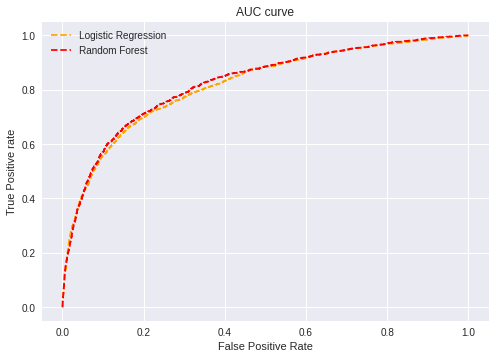

In [41]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Random Forest')


#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


# title
plt.title('AUC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [44]:
y_score = log_reg.predict(X_test_data) ## calling the predict function to predict test data
#print(f1_score(y_test_data, y_score, average="macro"))
precision = (precision_score(y_test_data, y_score, average="macro"))  ## calculating precision
recall = (recall_score(y_test_data, y_score, average="macro"))   ## calculating recall
print('Precision  after undersampling for Logistic Regression',precision)
print('Recall after undersampling for Logistic Regression',recall)
print('AUC Score after undersampling for Logistic Regression',auc_score1)



Precision  after undersampling for Logistic Regression 0.6256070995410299
Recall after undersampling for Logistic Regression 0.7422833333333334
AUC Score after undersampling for Logistic Regression 0.8186663999999999


In [45]:
y_score = rand_for.predict(X_test_data) #calling the predict function to predict test data
#print(f1_score(y_test_data, y_score, average="macro"))
precision = (precision_score(y_test_data, y_score, average="macro")) ## calculating precision
recall = (recall_score(y_test_data, y_score, average="macro"))  ## calculating recall
print('Precision  after undersampling for Random Forest Classifier',precision)
print('Recall after undersampling for Random Forest Classifier',recall)
print('AUC Score after undersampling for Random Forest Classifier',auc_score1)




Precision  after undersampling for Random Forest Classifier 0.6358665571698754
Recall after undersampling for Random Forest Classifier 0.75325
AUC Score after undersampling for Random Forest Classifier 0.8186663999999999


##### After Undersampling, the scores are better than previous case.

##  OverSampling using SMOTE

Instead of duplicating the minority classes values, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.


In [46]:
from imblearn.over_sampling import SMOTE


cols = X.columns.values.tolist()  ## get all the columns in the dataframe and 
smote = SMOTE(ratio= 0.35) ## create smote object and ratio is the number of minority classes to be added
X_smote, y_smote = smote.fit_sample(X, y)   ## resample
X_smote = pd.DataFrame(X_smote, columns =cols)
y_smote = pd.Series(y_smote)




y_smote.value_counts()


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    86832
1    30391
dtype: int64

In [47]:
log_reg.fit(X_smote, y_smote)  # model fit on the sampled dataset
rand_for.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
## model prediction
pred_prob1 = log_reg.predict_proba(X_test_data)
pred_prob2 = rand_for.predict_proba(X_test_data)


## Model Evaluation
from sklearn.metrics import roc_curve
 #roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test_data, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_data, pred_prob2[:,1], pos_label=1)


##pos_label - label of positive class
## pred_prob1 - predict probability of 1 class


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_data, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_data, pred_prob2[:,1]) ## pred_prob1 - predict probability of 1 class




print('the AUC score for Logistic Regression Model is -      ',auc_score1)
print("")
print('the AUC score for Random Forest Classifier Model is -   ',auc_score2)
print("")




the AUC score for Logistic Regression Model is -       0.8170548

the AUC score for Random Forest Classifier Model is -    0.8136675999999999



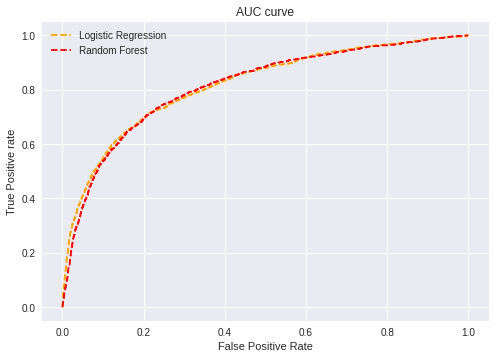

In [49]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Random Forest')


#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


# title
plt.title('AUC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [50]:
y_score = log_reg.predict(X_test_data)  ## predict the output on test data
#print(f1_score(y_test_data, y_score, average="macro"))
precision = (precision_score(y_test_data, y_score, average="macro")) 
## calculating precision
recall = (recall_score(y_test_data, y_score, average="macro")) ## calculating recall
print('Precision  after SMOTE for Logistic Regression',precision)
print('Recall after SMOTE for Logistic Regression',recall)
print('AUC Score after SMOTE for Logistic Regression',auc_score1)



Precision  after SMOTE for Logistic Regression 0.7140963146457384
Recall after SMOTE for Logistic Regression 0.7034333333333334
AUC Score after SMOTE for Logistic Regression 0.8170548


In [51]:
y_score = rand_for.predict(X_test_data)  ## predict the output on test data
#print(f1_score(y_test_data, y_score, average="macro"))
precision = (precision_score(y_test_data, y_score, average="macro")) ## calculating precision
recall = (recall_score(y_test_data, y_score, average="macro"))  ## calculating recall
print('Precision  after SMOTE for Random Forest Classifier',precision)
print('Recall after SMOTE for Random Forest Classifier',recall)
print('AUC Score after SMOTE for Random Forest Classifier',auc_score1)




Precision  after SMOTE for Random Forest Classifier 0.7207517718476708
Recall after SMOTE for Random Forest Classifier 0.6557833333333334
AUC Score after SMOTE for Random Forest Classifier 0.8170548


# HyperParameter Tuning

Logistic Regression Parameters

Solver - Algorithm to use in the optimization problem. For Binary classification, liblinear is used

class weights - since there is imbalance in the dataset, class weight - balanced will add more weights to the minority class

#### Random forest parameters
1. n_estimators - This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

2. max_features - These are the maximum number of features Random Forest is allowed to try in individual tree. Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.

In [101]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# # GridSearchCV tries all the combinations of the values passed in the dictionary and 
# #evaluates the model for each combination using the Cross-Validation method.



# #The purpose of the pipeline is to assemble several steps that can be cross-validated
# #together while setting different parameters

# pipe = Pipeline([('classifier' , RandomForestClassifier())])


# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(1000,2000,5000)),
#     'classifier__max_features' : list(range(6,15,28))}
# ]

# clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)



# best_clf = clf.fit(X_smote, y_smote)


In [119]:
log_reg = LogisticRegression(class_weight= 'balanced', solver='liblinear')
rand_for = RandomForestClassifier(max_depth=5, random_state=0,n_estimators = 1000,class_weight= 'balanced')
## class weight = balanced, since our data is imabalanced, the model gives weightage to the minority classes

log_reg.fit(X_smote,y_smote)
rand_for.fit(X_smote,y_smote)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [120]:
## model prediction
pred_prob1 = log_reg.predict_proba(X_test_data)
pred_prob2 = rand_for.predict_proba(X_test_data)


## Model Evaluation
from sklearn.metrics import roc_curve
 #roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test_data, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_data, pred_prob2[:,1], pos_label=1)

##pos_label - label of positive class
## pred_prob1 - predict probability of 1 class


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_data, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_data, pred_prob2[:,1])



print('the AUC score for Logistic Regression Model is -      ',auc_score1)
print("")
print('the AUC score for Random Forest Classifier Model is -   ',auc_score2)
print("")




the AUC score for Logistic Regression Model is -       0.8170581333333334

the AUC score for Random Forest Classifier Model is -    0.8071268666666667



In [121]:
y_score1 = log_reg.predict(X_test_data)  ## predict the output on test data
#print(f1_score(y_test_data, y_score, average="macro"))
## calculating precision
precision = (precision_score(y_test_data, y_score1, average="macro")) ## calculating recall
recall = (recall_score(y_test_data, y_score1, average="macro"))
print('Precision  after SMOTE for Logistic Regression',precision)
print('Recall after SMOTE for Logistic Regression',recall)
print('AUC Score after SMOTE for Logistic Regression',auc_score1)


Precision  after SMOTE for Logistic Regression 0.6284532859272336
Recall after SMOTE for Logistic Regression 0.7434000000000001
AUC Score after SMOTE for Logistic Regression 0.8170581333333334


In [123]:
y_score1 = pd.Series(y_score1) # convert the ndarry to series for exporting into csv


y_score1.to_csv('results1.csv',index=False) # using pandas to_csv to export the result

In [122]:
y_score2 = rand_for.predict(X_test_data)  ## predict the output on test data
#print(f1_score(y_test_data, y_score, average="macro"))
precision = (precision_score(y_test_data, y_score2, average="macro")) ## calculating precision
recall = (recall_score(y_test_data, y_score2, average="macro")) ## calculating recall
print('Precision  after SMOTE for Random Forest Classifier',precision)
print('Recall after SMOTE for Random Forest Classifier',recall)
print('AUC Score after SMOTE for Random Forest Classifier',auc_score2)



Precision  after SMOTE for Random Forest Classifier 0.6394382145915888
Recall after SMOTE for Random Forest Classifier 0.7382666666666666
AUC Score after SMOTE for Random Forest Classifier 0.8071268666666667


In [124]:
y_score2 = pd.Series(y_score2)  # convert the ndarry to series for exporting into csv

y_score2.to_csv('results2.csv',index=False) # using pandas to_csv to export the result

In [111]:
num_zeros = (y_score2 == 0).sum()
num_ones = (y_score2 == 1).sum()
nums = [num_zeros, num_ones]
print(nums)

[8445, 3055]
